In [1]:
# Figure 5

setwd("")


# Load in packages
library(tidyverse)
library(data.table)
library(readxl)
library(dplyr)
library(stringr)
library(ggplot2)
library(ggpubr)
library(ggtext)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




# Downloading ClinVar files 

Download from this page: https://ftp.ncbi.nlm.nih.gov/pub/clinvar/ 

The version used: 09-10-2023

The files downloaded were: clinvar_20230910.vcf.gz and clinvar_20230910.vcf.gz.tbi

Make sure to download bcftools and copy-paste the command into terminal.

In [ ]:
# GRCh37

tabix -p vcf clinvar/GRCh37_clinvar_20230910.vcf.gz

gzcat clinvar/GRCh37_clinvar_20230910.vcf.gz | bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t%INFO/CLNSIG\n' > clinvar/GRCh37_clinvar_20230910.tsv

# GRCh38 
tabix -p vcf clinvar/GRCh38_clinvar_20230910.vcf.gz

gzcat clinvar/GRCh38_clinvar_20230910.vcf.gz | bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t%INFO/CLNSIG\n' > clinvar/GRCh38_clinvar_20230910.tsv

# Making Figure

In [2]:
#Clear environment: 
rm(list=ls())

In [3]:
# Set your datasets below and read in the files containing all indels ≤ 50bp for each dataset:

## define dfs 
df_name_1 = "gnomAD"
df_name_2 = "IGM"
df_name_3 = "UKBB"

## Read in dataframe (total)
df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_lt50bp.csv")
df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_lt50bp.csv")
df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_lt50bp.csv")

#Read in the rAF_hi, rAF_lo and sAF_hi files. 
#rAF_hi indels are sAF ≤ 10^-4 and rAF > 10^-4. 
# rAF_lo indels are sAF ≤ 10^-4 and rAF ≤ 10^-4. 
# sAF_hi indels are sAF > 10^-4.

## Read in rAF_hi 

rAF_hi_bp_10_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp10_rAF_hiIndels.lt50bp.csv")
rAF_hi_bp_20_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp20_rAF_hiIndels.lt50bp.csv")
rAF_hi_bp_30_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp30_rAF_hiIndels.lt50bp.csv")
rAF_hi_bp_40_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp40_rAF_hiIndels.lt50bp.csv")

rAF_hi_bp_10_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp10_rAF_hiIndels.lt50bp.csv")
rAF_hi_bp_20_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp20_rAF_hiIndels.lt50bp.csv")
rAF_hi_bp_30_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp30_rAF_hiIndels.lt50bp.csv")
rAF_hi_bp_40_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp40_rAF_hiIndels.lt50bp.csv")

rAF_hi_bp_10_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp10_rAF_hiIndels.lt50bp.csv")
rAF_hi_bp_20_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp20_rAF_hiIndels.lt50bp.csv")
rAF_hi_bp_30_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp30_rAF_hiIndels.lt50bp.csv")
rAF_hi_bp_40_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp40_rAF_hiIndels.lt50bp.csv")

## Read in rAF_lo 



rAF_lo_bp_10_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp10_rAF_loIndels.lt50bp.csv")
rAF_lo_bp_20_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp20_rAF_loIndels.lt50bp.csv")
rAF_lo_bp_30_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp30_rAF_loIndels.lt50bp.csv")
rAF_lo_bp_40_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp40_rAF_loIndels.lt50bp.csv")

rAF_lo_bp_10_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp10_rAF_loIndels.lt50bp.csv")
rAF_lo_bp_20_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp20_rAF_loIndels.lt50bp.csv")
rAF_lo_bp_30_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp30_rAF_loIndels.lt50bp.csv")
rAF_lo_bp_40_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp40_rAF_loIndels.lt50bp.csv")

rAF_lo_bp_10_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp10_rAF_loIndels.lt50bp.csv")
rAF_lo_bp_20_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp20_rAF_loIndels.lt50bp.csv")
rAF_lo_bp_30_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp30_rAF_loIndels.lt50bp.csv")
rAF_lo_bp_40_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp40_rAF_loIndels.lt50bp.csv")


## Read in sAF_hi


sAF_hi_bp_10_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp10_sAF_hiIndels.lt50bp.csv")
sAF_hi_bp_20_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp20_sAF_hiIndels.lt50bp.csv")
sAF_hi_bp_30_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp30_sAF_hiIndels.lt50bp.csv")
sAF_hi_bp_40_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp40_sAF_hiIndels.lt50bp.csv")

sAF_hi_bp_10_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp10_sAF_hiIndels.lt50bp.csv")
sAF_hi_bp_20_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp20_sAF_hiIndels.lt50bp.csv")
sAF_hi_bp_30_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp30_sAF_hiIndels.lt50bp.csv")
sAF_hi_bp_40_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp40_sAF_hiIndels.lt50bp.csv")

sAF_hi_bp_10_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp10_sAF_hiIndels.lt50bp.csv")
sAF_hi_bp_20_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp20_sAF_hiIndels.lt50bp.csv")
sAF_hi_bp_30_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp30_sAF_hiIndels.lt50bp.csv")
sAF_hi_bp_40_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp40_sAF_hiIndels.lt50bp.csv")



In [4]:
#Define rAF_lo. 
rAF_lo = (1 * 10^-4)


In [5]:
#Read in ClinVar TSV files: 
#clinvar_2 = fread("clinvar38_20230730_onlyClinSig.txt",header = FALSE, quote="")
clinvar_2 = fread("clinvar/GRCh38_clinvar_20230910.tsv", header = FALSE, quote = "")
colnames(clinvar_2) = c("V1", "V2", "V3", "V4", "V10")

#clinvar = fread("clinvar_20230318_onlyClinSig.txt", header = FALSE, quote="")
clinvar = fread("clinvar/GRCh37_clinvar_20230910.tsv", header = FALSE, quote = "")
colnames(clinvar) = c("V1", "V2", "V3", "V4", "V10")



In [6]:

#Define ClinVar classfications. 

benign = c('Benign', 'Benign/Likely_benign', 'Benign|_drug_response')
LB = c('Likely_benign', 'Likely_benign|_drug_response|_other',
       'Likely_benign|_other')
conflict = c('Conflicting_interpretations_of_pathogenicity',
             'Conflicting_interpretations_of_pathogenicity|_association',
             'Conflicting_interpretations_of_pathogenicity|_drug_response',
             'Conflicting_interpretations_of_pathogenicity|_drug_response|_other',
             'Conflicting_interpretations_of_pathogenicity|_other',
             'Conflicting_interpretations_of_pathogenicity|_risk_factor',
             'Uncertain_significance',
             'Uncertain_significance|_risk_factor')  #conflict and uncertain significance
LP = c('Likely_pathogenic',
       'Likely_pathogenic|_risk_factor')
patho = c('Pathogenic',
          'Pathogenic/Likely_pathogenic',
          'Pathogenic/Likely_pathogenic|_other', 'Pathogenic|_Affects',
          'Pathogenic|_other', 'Pathogenic|_protective',
          'Pathogenic|_risk_factor')
other = c('Affects', '\\N', 'association',
          'confers_sensitivity', 'drug_response', 'not_provided', 'other',
          'protective', 'risk_factor')

#Define bp ranges. 
bp_range = c("10", "20", "30", "40")

In [7]:

#Give ClinVar file a VarID column. 
clinvar$VarID = paste0(clinvar$V1, "-", clinvar$V2, "-", clinvar$V3, "-", clinvar$V4)
clinvar_2$VarID = paste0(clinvar_2$V1, "-", clinvar_2$V2, "-", clinvar_2$V3, "-", clinvar_2$V4)


In [8]:

# Merge sAF and rAF with ClinVar and keep only the rows that are in ClinVar. Remove any duplicates, if any. 
## Merge sAF and rAF with clinvar and ONLY KEEP THE ROWS THAT ARE IN CLINVAR 

df_1_clinvar = merge(df_1, clinvar, by = "VarID") 
df_2_clinvar = merge(df_2, clinvar, by = "VarID") 
df_3_clinvar = merge(df_3, clinvar_2, by = "VarID") 

## Remove any duplicates, if any 
df_1_clinvar = distinct(df_1_clinvar) 
df_2_clinvar = distinct(df_2_clinvar) 
df_3_clinvar = distinct(df_3_clinvar) 


In [9]:

# Identify rAF_lo sAF indels that are benign/likely benign or pathogenic/likely pathogenic in both datasets. 

## gnomAD 

df_1_B_LB = df_1_clinvar %>% filter(V10 %in% benign | V10 %in% LB) %>% filter (sAF <= rAF_lo) 
df_1_P_LP = df_1_clinvar %>% filter(V10 %in% patho | V10 %in% LP) %>% filter (sAF <= rAF_lo) 


## IGM
df_2_B_LB = df_2_clinvar %>% filter(V10 %in% benign | V10 %in% LB) %>% filter (sAF <= rAF_lo) 
df_2_P_LP = df_2_clinvar %>% filter(V10 %in% patho | V10 %in% LP) %>% filter (sAF <= rAF_lo) 

## UK.BB

df_3_B_LB = df_3_clinvar %>% filter(V10 %in% benign | V10 %in% LB) %>% filter (sAF <= rAF_lo) 
df_3_P_LP = df_3_clinvar %>% filter(V10 %in% patho | V10 %in% LP) %>% filter (sAF <= rAF_lo) 


In [10]:

# Label indels with a log_key. A benign/likely benign indel has a log_key of 0. A pathogenic/likely pathogenic indel has a log key of 1. 

## Give benign/LB a 0 log_key
## Give patho/LP a 1 log_key 
df_1_B_LB$log_key = 0 
df_1_P_LP$log_key = 1 

# #IGM
df_2_B_LB$log_key = 0 
df_2_P_LP$log_key = 1 

#UK.BB
df_3_B_LB$log_key = 0 
df_3_P_LP$log_key = 1 


In [11]:

# Create output dataframes for bargraphs and logistic regression graphs. For the bar graph, we want to zoom into rAF < 0.05 for the 10bp region. 
df_1_output = rbind(df_1_B_LB, df_1_P_LP) %>% select (sAF, rAF_bp10, log_key)

df_2_output = rbind(df_2_B_LB, df_2_P_LP)  %>% select (sAF, rAF_bp10, log_key)

df_3_output = rbind(df_3_B_LB, df_3_P_LP)  %>% select (sAF, rAF_bp10, log_key)


In [12]:

## Mean Square Error 

## Make logistic regression of the rAF/sAF dataframes 
model_rAF_df1  =  glm(formula = log_key ~ rAF_bp10, family = "binomial", data = df_1_output)
model_rAF_df2  = glm(formula = log_key ~ rAF_bp10 , family = "binomial", data = df_2_output)
model_rAF_df3  = glm(formula = log_key ~ rAF_bp10 , family = "binomial", data = df_3_output)

model_sAF_df1  = glm(formula = log_key ~ sAF, family = "binomial", data = df_1_output)
model_sAF_df2  =  glm(formula = log_key ~ sAF, family = "binomial", data = df_2_output)
model_sAF_df3  =  glm(formula = log_key ~ sAF, family = "binomial", data = df_3_output)

## Make dataframe with predicted and actual values 
pred_actual_rAF_df1 = data.frame(pred = predict(model_rAF_df1), actual = df_1_output$rAF_bp10)
pred_actual_rAF_df2 = data.frame(pred = predict(model_rAF_df2), actual = df_2_output$rAF_bp10)
pred_actual_rAF_df3 = data.frame(pred = predict(model_rAF_df3), actual = df_3_output$rAF_bp10)

pred_actual_sAF_df1 = data.frame(pred = predict(model_sAF_df1), actual = df_1_output$sAF)
pred_actual_sAF_df2 = data.frame(pred = predict(model_sAF_df2), actual = df_2_output$sAF)
pred_actual_sAF_df3 = data.frame(pred = predict(model_sAF_df3), actual = df_3_output$sAF)


## Mean square error calculation 
MSE_rAF_df1 = mean((pred_actual_rAF_df1$actual - pred_actual_rAF_df1$pred)^2)
MSE_rAF_df2 = mean((pred_actual_rAF_df2$actual - pred_actual_rAF_df2$pred)^2)
MSE_rAF_df3 = mean((pred_actual_rAF_df3$actual - pred_actual_rAF_df3$pred)^2)
MSE_sAF_df1 = mean((pred_actual_sAF_df1$actual - pred_actual_sAF_df1$pred)^2)
MSE_sAF_df2 = mean((pred_actual_sAF_df2$actual - pred_actual_sAF_df2$pred)^2)
MSE_sAF_df3 = mean((pred_actual_sAF_df3$actual - pred_actual_sAF_df3$pred)^2)

print(paste0("gnomAD MSE, sAF: ", MSE_sAF_df1))
print(paste0("IGM MSE, sAF: ", MSE_sAF_df2))
print(paste0("UKBB MSE, sAF: ", MSE_sAF_df3))

print(paste0("gnomAD MSE, rAF: ", MSE_rAF_df1))
print(paste0("IGM MSE, rAF: ", MSE_rAF_df2))
print(paste0("UKBB MSE, rAF: ", MSE_rAF_df3))


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] "gnomAD MSE, sAF: 0.385713650867485"
[1] "IGM MSE, sAF: 4.91807260925162"
[1] "UKBB MSE, sAF: 0.318319359413138"
[1] "gnomAD MSE, rAF: 0.789498985312508"
[1] "IGM MSE, rAF: 4.1811633923442"
[1] "UKBB MSE, rAF: 1.45044984784626"


In [13]:
####### For the bargraph, we want to zoom into rAF < 0.05. 
bar_df_1 = df_1_output %>% filter(rAF_bp10 < 0.05)
bar_df_2 = df_2_output %>% filter(rAF_bp10 < 0.05)
bar_df_3 = df_3_output %>% filter(rAF_bp10 < 0.05)

#Create bargraphs.

bargraph_df_1 = ggplot (bar_df_1, aes(x = rAF_bp10 , fill = as.factor(log_key))) + geom_histogram(binwidth = 0.001, position = "dodge") + scale_y_continuous (trans = scales::pseudo_log_trans(), breaks = c(1,100, 1000, 10000)) + scale_fill_manual(labels = c("B/LB", "P/LP"), values = c("#000000", "#989898")) + labs( y = "Number of Unique Indels \n (gnomAD, log)", x = "rAF (10bp range)", fill = "Classification") +  theme(axis.text=element_text(size=20),  axis.title=element_text(size=20), legend.text = element_text(size = 20), legend.title = element_text(size = 20), legend.position = c(0.85,0.8), legend.background = element_rect(fill = "white", color = "grey"), panel.background = element_rect(fill = "white", color = "grey"), panel.grid.major = element_line(color = "white"), plot.margin = margin( 1, 1, 1, 1, "cm"), plot.title = element_text(hjust = 0.5, size = 32, margin = margin( 1, 1, 1, 1, "cm")), axis.title.y = element_text(margin = margin( 0.5, 0.5, 0.5, 0.5, "cm"), angle = 90), axis.title.x = element_text(margin = margin( 1, 1, 1, 1, "cm"))) 


bargraph_df_2 = ggplot (bar_df_2, aes(x = rAF_bp10 , fill = as.factor(log_key))) + geom_histogram(binwidth = 0.001, position = "dodge") + scale_y_continuous (trans = scales::pseudo_log_trans(), breaks = c(1,100, 1000, 10000)) + scale_fill_manual(labels = c("B/LB", "P/LP"), values = c("#000000", "#989898")) + labs( y = "Number of Unique Indels \n (IGM, log)", x = "rAF (10bp range)", fill = "Classification") +  theme(axis.text=element_text(size=20),  axis.title=element_text(size=20), legend.text = element_text(size = 20), legend.title = element_text(size = 20), legend.position = c(0.85, 0.8), legend.background = element_rect(fill = "white", color = "grey") , panel.background = element_rect(fill = "white", color = "grey"), panel.grid.major = element_line(color = "white"), plot.margin = margin( 1, 1, 1, 1, "cm"), plot.title = element_text(hjust = 0.5, size = 32, margin = margin( 1, 1, 1, 1, "cm")), axis.title.y = element_text(margin = margin( 0.5, 0.5, 0.5, 0.5, "cm"), angle = 90), axis.title.x = element_text(margin = margin( 1, 1, 1, 1, "cm")))


bargraph_df_3 = ggplot (bar_df_3, aes(x = rAF_bp10 , fill = as.factor(log_key))) + geom_histogram(binwidth = 0.001, position = "dodge") + scale_y_continuous (trans = scales::pseudo_log_trans(), breaks = c(1,100, 1000, 10000)) + scale_fill_manual(labels = c("B/LB", "P/LP"), values = c("#000000", "#989898")) + labs( y = "Number of Unique Indels \n (UKBB, log)", x = "rAF (10bp range)", fill = "Classification") +  theme(axis.text=element_text(size=20),  axis.title=element_text(size=20), legend.text = element_text(size = 20), legend.title = element_text(size = 20), legend.position = c(0.85, 0.8), legend.background = element_rect(fill = "white", color = "grey") , panel.background = element_rect(fill = "white", color = "grey"), panel.grid.major = element_line(color = "white"), plot.margin = margin( 1, 1, 1, 1, "cm"), plot.title = element_text(hjust = 0.5, size = 32, margin = margin( 1, 1, 1, 1, "cm")), axis.title.y = element_text(margin = margin( 0.5, 0.5, 0.5, 0.5, "cm"), angle = 90), axis.title.x = element_text(margin = margin( 1, 1, 1, 1, "cm")))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


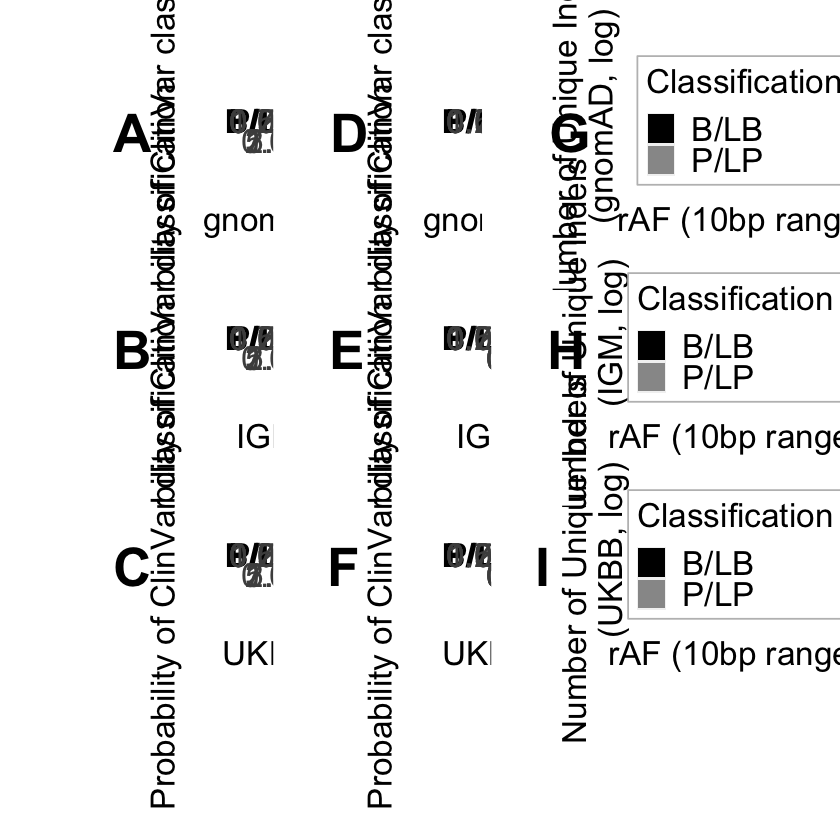

In [14]:


#Create logistic regression graphs with rAF on the x-axis. 

## for logistic regression with rAF on the x-axis, we want to only go up to 1 on the x-axis. 
## In this case, any rAF > 1 will be converted to 1. 

df_1_output_rAF = df_1_output
df_1_output_rAF$rAF_bp10[df_1_output_rAF$rAF_bp10 > 1] = 1

df_2_output_rAF = df_2_output
df_2_output_rAF$rAF_bp10[df_2_output_rAF$rAF_bp10 > 1] = 1

df_3_output_rAF = df_3_output
df_3_output_rAF$rAF_bp10[df_3_output_rAF$rAF_bp10 > 1] = 1

rAF_logreg_df_1 = ggplot(df_1_output_rAF, aes(x=rAF_bp10, y=log_key)) + 
  geom_point() +
  stat_smooth(method="glm", color="dark grey", se=TRUE, method.args = list(family=binomial)) + 
  xlim (0,1) + 
  labs( y = "Probability of ClinVar classification", x = "gnomAD rAF") +  
  theme(axis.text=element_text(size=20),  axis.title=element_text(size=20), plot.margin = margin( 1, 1, 1, 1, "cm"), axis.title.y = element_text(margin = margin( 1, 1, 1, 1, "cm"), angle = 90), axis.title.x = element_text(margin = margin( 1, 1, 1, 1, "cm"))) + 
  geom_text(x = 1.5 ,y = 0.9,inherit.aes = FALSE,label = paste0(""),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7) + 
  coord_cartesian(clip = "off") + 
  geom_text(x = -0.15 ,y = 1,inherit.aes = FALSE,label = paste0("P/LP" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7) + 
  geom_text(x = -0.15 ,y = 0,inherit.aes = FALSE,label = paste0("B/LB" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7)


rAF_logreg_df_2 = ggplot(df_2_output_rAF, aes(x=rAF_bp10, y=log_key)) + 
  geom_point() +
  stat_smooth(method="glm", color="dark grey", se=TRUE,
              method.args = list(family=binomial)) + xlim (0,1) + 
  labs( y = "Probability of ClinVar classification", x = "IGM rAF") +  
  theme(axis.text=element_text(size=20), axis.title=element_text(size=20), plot.margin = margin( 1, 1, 1, 1, "cm"), axis.title.y = element_text(margin = margin(1, 1, 1, 1, "cm"), angle = 90), axis.title.x = element_text(margin = margin( 1, 1, 1, 1, "cm"))) + 
  geom_text(x = 1.5 ,y = 0.9,inherit.aes = FALSE,label = paste0(""),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7) + 
  coord_cartesian(clip = "off") + 
  geom_text(x = -0.15 ,y = 1,inherit.aes = FALSE,label = paste0("P/LP" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7) +
  geom_text(x = -0.15 ,y = 0,inherit.aes = FALSE,label = paste0("B/LB" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7)


rAF_logreg_df_3 = ggplot(df_3_output_rAF, aes(x=rAF_bp10, y=log_key)) + 
  geom_point() +
  stat_smooth(method="glm", color="dark grey", se=TRUE,method.args = list(family=binomial))+ xlim (0,1) + 
  labs( y = "Probability of ClinVar classification", x = "UKBB rAF") +  
  theme(axis.text=element_text(size=20), axis.title=element_text(size=20), plot.margin = margin( 1, 1, 1, 1, "cm"), axis.title.y = element_text(margin = margin(1, 1, 1, 1, "cm"), angle = 90), axis.title.x = element_text(margin = margin( 1, 1, 1, 1, "cm"))) + 
  geom_text(x = 1.5 ,y = 0.9,inherit.aes = FALSE,label = paste0(""),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7) + 
  coord_cartesian(clip = "off") + 
  geom_text(x = -0.15 ,y = 1,inherit.aes = FALSE,label = paste0("P/LP" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7) + 
  geom_text(x = -0.15 ,y = 0,inherit.aes = FALSE,label = paste0("B/LB" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7)


#Find the logistic regression for sAF 

sAF_logreg_df_1 = ggplot(df_1_output, aes(x=sAF, y=log_key)) + geom_point() +
  stat_smooth(method="glm", color="dark grey", se=TRUE,
              method.args = list(family=binomial)) + xlim (0, 0.0001) + labs( y = "Probability of ClinVar classification", x = "gnomAD sAF") +  theme(axis.text=element_text(size=20),  axis.title=element_text(size=20) , plot.margin = margin( 1, 1, 1, 1, "cm"), axis.title.y = element_text(margin = margin( 1, 1, 1, 1, "cm"), angle = 90), axis.title.x = element_text(margin = margin( 1, 1, 1, 1, "cm"))) + geom_text(x = 0.0001 ,y = 0.9,inherit.aes = FALSE,label = paste0(""),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7) + coord_cartesian(clip = "off") + geom_text(x = -0.000015 ,y = 1,inherit.aes = FALSE,label = paste0("P/LP" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7) + geom_text(x =  -0.000015 ,y = 0,inherit.aes = FALSE,label = paste0("B/LB" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7)

sAF_logreg_df_2 = ggplot(df_2_output, aes(x=sAF, y=log_key)) + geom_point() +
  stat_smooth(method="glm", color="dark grey", se=TRUE,
              method.args = list(family=binomial)) + xlim (0, 0.0001) + labs( y = "Probability of ClinVar classification", x = "IGM sAF") +  theme(axis.text=element_text(size=20), axis.title=element_text(size=20), plot.margin = margin( 1, 1, 1, 1, "cm"), axis.title.y = element_text(margin = margin( 1, 1, 1, 1, "cm"), angle = 90), axis.title.x = element_text(margin = margin( 1, 1, 1, 1, "cm"))) + geom_text(x = 0.0001 ,y = 0.9,inherit.aes = FALSE,label = paste0(""),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7) + coord_cartesian(clip = "off") + geom_text(x =  -0.000015 ,y = 1,inherit.aes = FALSE,label = paste0("P/LP" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7) + geom_text(x =  -0.000015 ,y = 0,inherit.aes = FALSE,label = paste0("B/LB" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7)


sAF_logreg_df_3 = ggplot(df_3_output, aes(x=sAF, y=log_key)) + geom_point() +
  stat_smooth(method="glm", color="dark grey", se=TRUE,
              method.args = list(family=binomial)) + xlim (0, 0.0001) + labs( y = "Probability of ClinVar classification", x = "UKBB sAF") +  theme(axis.text=element_text(size=20), axis.title=element_text(size=20), plot.margin = margin( 1, 1, 1, 1, "cm"), axis.title.y = element_text(margin = margin( 1, 1, 1, 1, "cm"), angle = 90), axis.title.x = element_text(margin = margin( 1, 1, 1, 1, "cm"))) + geom_text(x = 0.0001 ,y = 1,inherit.aes = FALSE,label = paste0("") ,check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7) + coord_cartesian(clip = "off") + geom_text(x =  -0.000015 ,y = 1,inherit.aes = FALSE,label = paste0("P/LP" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7) + geom_text(x =  -0.000015 ,y = 0,inherit.aes = FALSE,label = paste0("B/LB" ),check_overlap = TRUE,hjust = 1,fontface = 'bold',size = 7)



graph_summary = ggarrange(print(sAF_logreg_df_1), 
                          print(rAF_logreg_df_1),
                          print(bargraph_df_1),
                          print(sAF_logreg_df_2), 
                          print(rAF_logreg_df_2), 
                          print(bargraph_df_2), 
                          print(sAF_logreg_df_3), 
                          print(rAF_logreg_df_3), 
                          print(bargraph_df_3), 
                          labels = c("A", "D", "G", "B", "E", "H", "C", "F", "I"), 
                          ncol = 3, nrow = 3, font.label = list(size = 32, color = "black")) + theme(plot.margin = unit(c(2,2,2,2), "cm"))

graph_summary 

setwd("")

ggsave("Fig5.jpg", width = 80, height = 60, units = c("cm"), dpi = 300)









In [15]:
#data for p value data frames
conditions = c("rAF_hi", "rAF_lo", "sAF_hi")

categories = c("benign", "LB", "VUS/other", "LP", "patho" )

for (i in conditions ) {
  for (j in categories) {
    ## get temp variable for the condition 
    condition_df1 = paste0(i, "_bp_10_df_1")
    condition_df2 = paste0(i, "_bp_10_df_2")
    condition_df3 = paste0(i, "_bp_10_df_3")
    
    ## set a temp variable for a clinvar merge 
    clinvar_cond_df1 = paste0("clinvar_", i, "_bp_10_df_1")
    clinvar_cond_df2 = paste0("clinvar_", i, "_bp_10_df_2")
    clinvar_cond_df3 = paste0("clinvar_", i, "_bp_10_df_3")
    
    ## merge with clinvar
    assign (clinvar_cond_df1, merge(get(condition_df1), clinvar, by = "VarID"))
    assign (clinvar_cond_df2, merge(get(condition_df2), clinvar, by = "VarID"))
    ## we think that there is smth going on with the clinvar merging here. 
    assign (clinvar_cond_df3, merge(get(condition_df3), clinvar_2, by = "VarID"))
    
    ## get a dataframe only for the category (ie. benign, LB, conflict, LP, patho, other)
    if (j != "VUS/other") {
      ##  set a temp variable for a clinvar merge
      category_cond_df1 = paste0(j , "_", i, "_bp_10_df1")
      category_cond_df2 = paste0(j , "_", i, "_bp_10_df2")
      category_cond_df3 = paste0(j , "_", i, "_bp_10_df3")
      
      #assign temp variable
      assign (category_cond_df1, get(clinvar_cond_df1) %>% filter(V10 %in% get(j)))
      assign (category_cond_df2, get(clinvar_cond_df2) %>% filter(V10 %in% get(j)))
      assign (category_cond_df3, get(clinvar_cond_df3) %>% filter(V10 %in% get(j)))
    }
    
    else {
      ##  set a temp variable for a clinvar merge
      category_cond_df1 = paste0("VUS_other_", i, "_bp_10_df1")
      category_cond_df2 = paste0("VUS_other_", i, "_bp_10_df2")
      category_cond_df3 = paste0("VUS_other_", i, "_bp_10_df3")
      
      #assign temp variable
      assign (category_cond_df1, get(clinvar_cond_df1) %>% filter(V10 %in% other | V10 %in% conflict))
      assign (category_cond_df2, get(clinvar_cond_df2) %>% filter(V10 %in% other | V10 %in% conflict))
      assign (category_cond_df3, get(clinvar_cond_df3) %>% filter(V10 %in% other | V10 %in% conflict))
    }
    
  }
}



In [16]:


## make the df for each category for db 1 

sAF_hi_categories_df1 = c(nrow(benign_sAF_hi_bp_10_df1), nrow(LB_sAF_hi_bp_10_df1), nrow(VUS_other_sAF_hi_bp_10_df1), nrow(LP_sAF_hi_bp_10_df1), nrow(patho_sAF_hi_bp_10_df1))

rAF_hi_categories_df1 = c(nrow(benign_rAF_hi_bp_10_df1), nrow(LB_rAF_hi_bp_10_df1), nrow(VUS_other_rAF_hi_bp_10_df1), nrow(LP_rAF_hi_bp_10_df1), nrow(patho_rAF_hi_bp_10_df1))

rAF_lo_categories_df1 = c(nrow(benign_rAF_lo_bp_10_df1), nrow(LB_rAF_lo_bp_10_df1), nrow(VUS_other_rAF_lo_bp_10_df1), nrow(LP_rAF_lo_bp_10_df1), nrow(patho_rAF_lo_bp_10_df1))

categories_df1 = data.frame(categories, sAF_hi_categories_df1, rAF_hi_categories_df1, rAF_lo_categories_df1)


## make the df for each category for db 2
sAF_hi_categories_df2 = c(nrow(benign_sAF_hi_bp_10_df2), nrow(LB_sAF_hi_bp_10_df2), nrow(VUS_other_sAF_hi_bp_10_df2), nrow(LP_sAF_hi_bp_10_df2), nrow(patho_sAF_hi_bp_10_df2))

rAF_hi_categories_df2 = c(nrow(benign_rAF_hi_bp_10_df2), nrow(LB_rAF_hi_bp_10_df2), nrow(VUS_other_rAF_hi_bp_10_df2), nrow(LP_rAF_hi_bp_10_df2), nrow(patho_rAF_hi_bp_10_df2))

rAF_lo_categories_df2 = c(nrow(benign_rAF_lo_bp_10_df2), nrow(LB_rAF_lo_bp_10_df2), nrow(VUS_other_rAF_lo_bp_10_df2), nrow(LP_rAF_lo_bp_10_df2), nrow(patho_rAF_lo_bp_10_df2))

categories_df2 = data.frame(categories, sAF_hi_categories_df2, rAF_hi_categories_df2, rAF_lo_categories_df2)

## make the df for each category for db 3
sAF_hi_categories_df3 = c(nrow(benign_sAF_hi_bp_10_df3), nrow(LB_sAF_hi_bp_10_df3), nrow(VUS_other_sAF_hi_bp_10_df3), nrow(LP_sAF_hi_bp_10_df3), nrow(patho_sAF_hi_bp_10_df3))

rAF_hi_categories_df3 = c(nrow(benign_rAF_hi_bp_10_df3), nrow(LB_rAF_hi_bp_10_df3), nrow(VUS_other_rAF_hi_bp_10_df3), nrow(LP_rAF_hi_bp_10_df3), nrow(patho_rAF_hi_bp_10_df3))

rAF_lo_categories_df3 = c(nrow(benign_rAF_lo_bp_10_df3), nrow(LB_rAF_lo_bp_10_df3), nrow(VUS_other_rAF_lo_bp_10_df3), nrow(LP_rAF_lo_bp_10_df3), nrow(patho_rAF_lo_bp_10_df3))

categories_df3 = data.frame(categories, sAF_hi_categories_df3, rAF_hi_categories_df3, rAF_lo_categories_df3)

categories_df1
categories_df2
categories_df3

fwrite(categories_df1, "2023-05-08_categories_clinvar_gnomad.csv")
fwrite(categories_df2, "2023-05-08_categories_clinvar_igm.csv")
fwrite(categories_df3, "2023-05-08_categories_clinvar_UKBB.csv") #may have to change name scheme later 


categories,sAF_hi_categories_df1,rAF_hi_categories_df1,rAF_lo_categories_df1
<chr>,<int>,<int>,<int>
benign,7485,402,1537
LB,2420,881,5036
VUS/other,2154,1046,9000
LP,45,40,1339
patho,423,201,7720


categories,sAF_hi_categories_df2,rAF_hi_categories_df2,rAF_lo_categories_df2
<chr>,<int>,<int>,<int>
benign,1559,61,101
LB,730,230,316
VUS/other,1770,886,5013
LP,44,29,671
patho,452,166,4086


categories,sAF_hi_categories_df3,rAF_hi_categories_df3,rAF_lo_categories_df3
<chr>,<int>,<int>,<int>
benign,2819,57,367
LB,1044,226,2237
VUS/other,881,167,4279
LP,15,2,406
patho,164,13,2047


In [17]:

# Make Tables S7a, S7b, S7c

#Find the percentage of rAF_hi indels for each bp region for each of the following categories: Benign/likely benign (LB), pathogenic (patho) and likey pathogenic (LP) 

cat = c("benign", "LB", "patho", "LP")

## Find sAF_lo
for (i in cat) {
  ## set var 
  cat_1 = paste0(i, "_sAF_lo_df1")
  cat_2 = paste0(i, "_sAF_lo_df2")
  cat_3 = paste0(i, "_sAF_lo_df3")
  
  #assign
  assign(cat_1, df_1_clinvar %>% filter(sAF <= rAF_lo) %>% filter(V10 %in% get(i)))
  assign(cat_2, df_2_clinvar %>% filter(sAF <= rAF_lo) %>% filter(V10 %in% get(i)))
  assign(cat_3, df_3_clinvar %>% filter(sAF <= rAF_lo) %>% filter(V10 %in% get(i)))
}

## Find percentage
for (i in bp_range) {
  for (j in cat) {
    ## get denominator (_lo)
    sAF_lo_df1 = paste0(j, "_sAF_lo_df1")
    sAF_lo_df2 = paste0(j, "_sAF_lo_df2")
    sAF_lo_df3 = paste0(j, "_sAF_lo_df3")
    
    ## set percent output 
    prct_rAF_hi_1 = paste0("prct_bp_", i, "_", j, "_df1")
    prct_rAF_hi_2 = paste0("prct_bp_", i, "_", j, "_df2")
    prct_rAF_hi_3 = paste0("prct_bp_", i, "_", j, "_df3")
    
    #set total output
    total_rAF_hi_1 = paste0("total_bp_", i, "_", j, "_df1")
    total_rAF_hi_2 = paste0("total_bp_", i, "_", j, "_df2")
    total_rAF_hi_3 = paste0("total_bp_", i, "_", j, "_df3")
    ## set rAF region 
    temp_region = paste0("rAF_bp", i)
    
    ## assign percentage 
    assign (prct_rAF_hi_1, paste0(round(nrow(get(sAF_lo_df1) %>% filter(get(temp_region) > rAF_lo)) / nrow(get(sAF_lo_df1)) * 100 , 0), "%"))
    assign(total_rAF_hi_1, paste0(nrow(get(sAF_lo_df1) %>% filter(get(temp_region) > rAF_lo))))
    
    assign (prct_rAF_hi_2, paste0(round(nrow(get(sAF_lo_df2) %>% filter(get(temp_region) > rAF_lo)) / nrow(get(sAF_lo_df2)) * 100 , 0), "%"))
    assign(total_rAF_hi_2, paste0(nrow(get(sAF_lo_df2) %>% filter(get(temp_region) > rAF_lo))))
    
    assign (prct_rAF_hi_3, paste0(round(nrow(get(sAF_lo_df3) %>% filter(get(temp_region) > rAF_lo)) / nrow(get(sAF_lo_df3)) * 100 , 0), "%"))
    assign(total_rAF_hi_3, paste0(nrow(get(sAF_lo_df3) %>% filter(get(temp_region) > rAF_lo))))
    print(total_rAF_hi_3)
    
  }
}


## make df that show the percentage of rAF_hi indels for each categories for dataframe 1 
sAF_lo_df1 = c(nrow(benign_sAF_lo_df1), nrow(LB_sAF_lo_df1), nrow(patho_sAF_lo_df1), nrow(LP_sAF_lo_df1))
prct_rAF_hi_10bp_df1 = c(paste0(total_bp_10_benign_df1," (",prct_bp_10_benign_df1,")"), paste0(total_bp_10_LB_df1," (",prct_bp_10_LB_df1,")"), paste0(total_bp_10_patho_df1," (",prct_bp_10_patho_df1,")"), paste0(total_bp_10_LP_df1," (",prct_bp_10_LP_df1,")"))
prct_rAF_hi_20bp_df1 = c(paste0(total_bp_20_benign_df1," (",prct_bp_20_benign_df1,")"), paste0(total_bp_20_LB_df1," (",prct_bp_20_LB_df1,")"), paste0(total_bp_20_patho_df1," (",prct_bp_20_patho_df1,")"), paste0(total_bp_20_LP_df1," (",prct_bp_20_LP_df1,")"))
prct_rAF_hi_30bp_df1 = c(paste0(total_bp_30_benign_df1," (",prct_bp_30_benign_df1,")"), paste0(total_bp_30_LB_df1," (",prct_bp_30_LB_df1,")"), paste0(total_bp_30_patho_df1," (",prct_bp_30_patho_df1,")"), paste0(total_bp_30_LP_df1," (",prct_bp_30_LP_df1,")"))
prct_rAF_hi_40bp_df1 = c(paste0(total_bp_40_benign_df1," (",prct_bp_40_benign_df1,")"), paste0(total_bp_40_LB_df1," (",prct_bp_40_LB_df1,")"), paste0(total_bp_40_patho_df1," (",prct_bp_40_patho_df1,")"), paste0(total_bp_40_LP_df1," (",prct_bp_40_LP_df1,")"))

prct_rAF_hi_cat_df_1 = data.frame (cat, sAF_lo_df1, prct_rAF_hi_10bp_df1, prct_rAF_hi_20bp_df1, prct_rAF_hi_30bp_df1, prct_rAF_hi_40bp_df1)


## make df that show the percentage of rAF_hi indels for each categories for dataframe 2 
sAF_lo_df2 = c(nrow(benign_sAF_lo_df2), nrow(LB_sAF_lo_df2), nrow(patho_rAF_lo_bp_10_df2), nrow(LP_sAF_lo_df2))
prct_rAF_hi_10bp_df2 = c(paste0(total_bp_10_benign_df2," (",prct_bp_10_benign_df2,")"), paste0(total_bp_10_LB_df2," (",prct_bp_10_LB_df2,")"), paste0(total_bp_10_patho_df2," (",prct_bp_10_patho_df2,")"), paste0(total_bp_10_LP_df2," (",prct_bp_10_LP_df2,")"))
prct_rAF_hi_20bp_df2 = c(paste0(total_bp_20_benign_df2," (",prct_bp_20_benign_df2,")"), paste0(total_bp_20_LB_df2," (",prct_bp_20_LB_df2,")"), paste0(total_bp_20_patho_df2," (",prct_bp_20_patho_df2,")"), paste0(total_bp_20_LP_df2," (",prct_bp_20_LP_df2,")"))
prct_rAF_hi_30bp_df2 = c(paste0(total_bp_30_benign_df2," (",prct_bp_30_benign_df2,")"), paste0(total_bp_30_LB_df2," (",prct_bp_30_LB_df2,")"), paste0(total_bp_30_patho_df2," (",prct_bp_30_patho_df2,")"), paste0(total_bp_30_LP_df2," (",prct_bp_30_LP_df2,")"))
prct_rAF_hi_40bp_df2 = c(paste0(total_bp_40_benign_df2," (",prct_bp_40_benign_df2,")"), paste0(total_bp_40_LB_df2," (",prct_bp_40_LB_df2,")"), paste0(total_bp_40_patho_df2," (",prct_bp_40_patho_df2,")"), paste0(total_bp_40_LP_df2," (",prct_bp_40_LP_df2,")"))

prct_rAF_hi_cat_df_2 = data.frame (cat, sAF_lo_df2, prct_rAF_hi_10bp_df2, prct_rAF_hi_20bp_df2, prct_rAF_hi_30bp_df2, prct_rAF_hi_40bp_df2)

## make df that show the percentage of rAF_hi indels for each categories for dataframe 2 
sAF_lo_df3 = c(nrow(benign_sAF_lo_df3), nrow(LB_sAF_lo_df3), nrow(patho_rAF_lo_bp_10_df3), nrow(LP_sAF_lo_df3))  
prct_rAF_hi_10bp_df3 = c(paste0(total_bp_10_benign_df3," (",prct_bp_10_benign_df3,")"), paste0(total_bp_10_LB_df3," (",prct_bp_10_LB_df3,")"), paste0(total_bp_10_patho_df3," (",prct_bp_10_patho_df3,")"), paste0(total_bp_10_LP_df3," (",prct_bp_10_LP_df3,")"))
prct_rAF_hi_20bp_df3 = c(paste0(total_bp_20_benign_df3," (",prct_bp_20_benign_df3,")"), paste0(total_bp_20_LB_df3," (",prct_bp_20_LB_df3,")"), paste0(total_bp_20_patho_df3," (",prct_bp_20_patho_df3,")"), paste0(total_bp_20_LP_df3," (",prct_bp_20_LP_df3,")"))
prct_rAF_hi_30bp_df3 = c(paste0(total_bp_30_benign_df3," (",prct_bp_30_benign_df3,")"), paste0(total_bp_30_LB_df3," (",prct_bp_30_LB_df3,")"), paste0(total_bp_30_patho_df3," (",prct_bp_30_patho_df3,")"), paste0(total_bp_30_LP_df3," (",prct_bp_30_LP_df3,")"))
prct_rAF_hi_40bp_df3 = c(paste0(total_bp_40_benign_df3," (",prct_bp_40_benign_df3,")"), paste0(total_bp_40_LB_df3," (",prct_bp_40_LB_df3,")"), paste0(total_bp_40_patho_df3," (",prct_bp_40_patho_df3,")"), paste0(total_bp_40_LP_df3," (",prct_bp_40_LP_df3,")"))

prct_rAF_hi_cat_df_3 = data.frame (cat, sAF_lo_df3, prct_rAF_hi_10bp_df3, prct_rAF_hi_20bp_df3, prct_rAF_hi_30bp_df3, prct_rAF_hi_40bp_df3)

prct_rAF_hi_cat_df_1
prct_rAF_hi_cat_df_2
prct_rAF_hi_cat_df_3

fwrite(prct_rAF_hi_cat_df_1, "Table_S7a.csv")
fwrite(prct_rAF_hi_cat_df_2, "Table_S7b.csv")
fwrite(prct_rAF_hi_cat_df_3, "Table_S7c.csv")

[1] "total_bp_10_benign_df3"
[1] "total_bp_10_LB_df3"
[1] "total_bp_10_patho_df3"
[1] "total_bp_10_LP_df3"
[1] "total_bp_20_benign_df3"
[1] "total_bp_20_LB_df3"
[1] "total_bp_20_patho_df3"
[1] "total_bp_20_LP_df3"
[1] "total_bp_30_benign_df3"
[1] "total_bp_30_LB_df3"
[1] "total_bp_30_patho_df3"
[1] "total_bp_30_LP_df3"
[1] "total_bp_40_benign_df3"
[1] "total_bp_40_LB_df3"
[1] "total_bp_40_patho_df3"
[1] "total_bp_40_LP_df3"


cat,sAF_lo_df1,prct_rAF_hi_10bp_df1,prct_rAF_hi_20bp_df1,prct_rAF_hi_30bp_df1,prct_rAF_hi_40bp_df1
<chr>,<int>,<chr>,<chr>,<chr>,<chr>
benign,1939,402 (21%),495 (26%),563 (29%),602 (31%)
LB,5917,881 (15%),1191 (20%),1338 (23%),1461 (25%)
patho,7921,201 (3%),292 (4%),385 (5%),528 (7%)
LP,1379,40 (3%),54 (4%),72 (5%),97 (7%)


cat,sAF_lo_df2,prct_rAF_hi_10bp_df2,prct_rAF_hi_20bp_df2,prct_rAF_hi_30bp_df2,prct_rAF_hi_40bp_df2
<chr>,<int>,<chr>,<chr>,<chr>,<chr>
benign,162,61 (38%),71 (44%),72 (44%),74 (46%)
LB,546,230 (42%),280 (51%),295 (54%),301 (55%)
patho,4086,166 (4%),250 (6%),308 (7%),356 (8%)
LP,700,29 (4%),44 (6%),61 (9%),68 (10%)


cat,sAF_lo_df3,prct_rAF_hi_10bp_df3,prct_rAF_hi_20bp_df3,prct_rAF_hi_30bp_df3,prct_rAF_hi_40bp_df3
<chr>,<int>,<chr>,<chr>,<chr>,<chr>
benign,424,57 (13%),66 (16%),77 (18%),82 (19%)
LB,2463,226 (9%),280 (11%),317 (13%),343 (14%)
patho,2047,13 (1%),22 (1%),30 (1%),37 (2%)
LP,408,2 (0%),5 (1%),5 (1%),14 (3%)


In [18]:

## Find the number of rAF_hi by sAF P/LP indels that have a rAF > 1% 


for (i in bp_range) {
  
  temp_df1 = paste0("bp_", i,"_P_LP_rAF_gt_1_df1")
  temp_df2 = paste0("bp_", i,"_P_LP_rAF_gt_1_df2")
  temp_df3 = paste0("bp_", i,"_P_LP_rAF_gt_1_df3")
  
  ## set rAF region 
  temp_region = paste0("rAF_bp", i)
  
  assign(temp_df1, nrow(df_1_clinvar %>% filter (sAF <= rAF_lo & get(temp_region) > rAF_lo) %>%  filter(V10 %in% patho | V10 %in% LP) %>% filter(get(temp_region) > 0.01)))
  assign(temp_df2, nrow(df_2_clinvar %>% filter (sAF <= rAF_lo & get(temp_region) > rAF_lo) %>% filter(V10 %in% patho | V10 %in% LP) %>% filter(get(temp_region) > 0.01)))
  assign(temp_df3, nrow(df_3_clinvar %>% filter (sAF <= rAF_lo & get(temp_region) > rAF_lo) %>% filter(V10 %in% patho | V10 %in% LP) %>% filter(get(temp_region) > 0.01)))
}

P_LP_rAF_gt_1_df1 = c(bp_10_P_LP_rAF_gt_1_df1, bp_20_P_LP_rAF_gt_1_df1, bp_30_P_LP_rAF_gt_1_df1, bp_40_P_LP_rAF_gt_1_df1)
P_LP_rAF_gt_1_df2 = c(bp_10_P_LP_rAF_gt_1_df2, bp_20_P_LP_rAF_gt_1_df2, bp_30_P_LP_rAF_gt_1_df2, bp_40_P_LP_rAF_gt_1_df2)
P_LP_rAF_gt_1_df3 = c(bp_10_P_LP_rAF_gt_1_df3, bp_20_P_LP_rAF_gt_1_df3, bp_30_P_LP_rAF_gt_1_df3, bp_40_P_LP_rAF_gt_1_df3)

dataframe_P_LP_gt_1 = data.frame(bp_range, P_LP_rAF_gt_1_df1, P_LP_rAF_gt_1_df2, P_LP_rAF_gt_1_df3)


dataframe_P_LP_gt_1


bp_range,P_LP_rAF_gt_1_df1,P_LP_rAF_gt_1_df2,P_LP_rAF_gt_1_df3
<chr>,<int>,<int>,<int>
10,12,14,2
20,23,22,3
30,46,27,4
40,60,30,6


In [21]:
## Find the number of rAF_hi by sAF B/LB indels that have a rAF > 1% 


for (i in bp_range) {
  
  temp_df1 = paste0("bp_", i,"_B_LB_rAF_gt_1_df1")
  temp_df2 = paste0("bp_", i,"_B_LB_rAF_gt_1_df2")
  temp_df3 = paste0("bp_", i,"_B_LB_rAF_gt_1_df3")
  
  ## set rAF region 
  temp_region = paste0("rAF_bp", i)
  
  assign(temp_df1, nrow(df_1_clinvar %>% filter (sAF <= rAF_lo & get(temp_region) > rAF_lo) %>%  filter(V10 %in% benign | V10 %in% LB) %>% filter(get(temp_region) > 0.01)))
  assign(temp_df2, nrow(df_2_clinvar %>% filter (sAF <= rAF_lo & get(temp_region) > rAF_lo) %>% filter(V10 %in% benign | V10 %in% LB) %>% filter(get(temp_region) > 0.01)))
  assign(temp_df3, nrow(df_3_clinvar %>% filter (sAF <= rAF_lo & get(temp_region) > rAF_lo) %>% filter(V10 %in% benign | V10 %in% LB) %>% filter(get(temp_region) > 0.01)))
}

B_LB_rAF_gt_1_df1 = c(bp_10_B_LB_rAF_gt_1_df1, bp_20_B_LB_rAF_gt_1_df1, bp_30_B_LB_rAF_gt_1_df1, bp_40_B_LB_rAF_gt_1_df1)
B_LB_rAF_gt_1_df2 = c(bp_10_B_LB_rAF_gt_1_df2, bp_20_B_LB_rAF_gt_1_df2, bp_30_B_LB_rAF_gt_1_df2, bp_40_B_LB_rAF_gt_1_df2)
B_LB_rAF_gt_1_df3 = c(bp_10_B_LB_rAF_gt_1_df3, bp_20_B_LB_rAF_gt_1_df3, bp_30_B_LB_rAF_gt_1_df3, bp_40_B_LB_rAF_gt_1_df3)

dataframe_B_LB_gt_1 = data.frame(bp_range, B_LB_rAF_gt_1_df1, B_LB_rAF_gt_1_df2, B_LB_rAF_gt_1_df3)


dataframe_B_LB_gt_1

bp_range,B_LB_rAF_gt_1_df1,B_LB_rAF_gt_1_df2,B_LB_rAF_gt_1_df3
<chr>,<int>,<int>,<int>
10,392,124,113
20,525,165,133
30,609,179,143
40,646,186,150


In [20]:

## Supplementary Excel 1 and Excel 2 


#Make supplementary excel files that show the number of pathogenic/likely pathogenic and benign/likely benign indels there are for each rAF value (rounded to the 6th decimal place) for both datasets. 

### Supplementary excel 1: for database 1 
df_1_B_LB$rAF_bp10 = round(df_1_B_LB$rAF_bp10, 6 )
df_1_P_LP$rAF_bp10 = round(df_1_P_LP$rAF_bp10, 6 )


df_1_freq_B_LB =  df_1_B_LB %>% group_by(rAF_bp10) %>% summarise(count_B_LB=n())
df_1_freq_P_LP =  df_1_P_LP %>% group_by(rAF_bp10) %>% summarise(count_P_LP=n())

df_1_freq = merge(df_1_freq_B_LB, df_1_freq_P_LP, by = "rAF_bp10", all = TRUE)
df_1_freq[is.na(df_1_freq)] = 0

df_1_freq

fwrite(df_1_freq, "supplementary_excel_1.csv")

### Supplementary excel 1: for database 2
df_2_B_LB$rAF_bp10 = round(df_2_B_LB$rAF_bp10, 6 )
df_2_P_LP$rAF_bp10 = round(df_2_P_LP$rAF_bp10, 6 )


df_2_freq_B_LB =  df_2_B_LB %>% group_by(rAF_bp10) %>% summarise(count_B_LB=n())
df_2_freq_P_LP =  df_2_P_LP %>% group_by(rAF_bp10) %>% summarise(count_P_LP=n())

df_2_freq = merge(df_2_freq_B_LB, df_2_freq_P_LP, by = "rAF_bp10", all = TRUE)
df_2_freq[is.na(df_2_freq)] = 0

df_2_freq

fwrite(df_2_freq, "supplementary_excel_2.csv")


### Supplementary excel 1: for database 3
df_3_B_LB$rAF_bp10 = round(df_3_B_LB$rAF_bp10, 6 )
df_3_P_LP$rAF_bp10 = round(df_3_P_LP$rAF_bp10, 6 )


df_3_freq_B_LB =  df_3_B_LB %>% group_by(rAF_bp10) %>% summarise(count_B_LB=n())
df_3_freq_P_LP =  df_3_P_LP %>% group_by(rAF_bp10) %>% summarise(count_P_LP=n())

df_3_freq = merge(df_3_freq_B_LB, df_3_freq_P_LP, by = "rAF_bp10", all = TRUE)
df_3_freq[is.na(df_3_freq)] = 0

df_3_freq

fwrite(df_3_freq, "supplementary_excel_3.csv")



rAF_bp10,count_B_LB,count_P_LP
<dbl>,<dbl>,<dbl>
4.0e-06,1170,3437
5.0e-06,109,121
6.0e-06,91,100
7.0e-06,23,64
8.0e-06,765,1563
9.0e-06,67,78
1.0e-05,30,32
1.1e-05,51,27
1.2e-05,493,786


rAF_bp10,count_B_LB,count_P_LP
<dbl>,<dbl>,<dbl>
1.3e-05,100,2469
1.4e-05,7,44
1.5e-05,4,21
1.6e-05,4,16
1.7e-05,2,13
1.8e-05,0,6
1.9e-05,0,6
2.0e-05,0,4
2.1e-05,1,7


rAF_bp10,count_B_LB,count_P_LP
<dbl>,<dbl>,<dbl>
1.0e-06,219,160
2.0e-06,246,618
3.0e-06,118,161
4.0e-06,6,4
5.0e-06,109,111
6.0e-06,128,242
7.0e-06,82,75
8.0e-06,76,65
9.0e-06,87,118
